In [1]:
import pandas as pd

#Step 1:Loading the dataset
file_path = "insurance.csv"
df = pd.read_csv(file_path)

#Step 2:Displaying the first 5 rows
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
# Show basic dataset info
df.info()

# Check for missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Missing values in each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the dataset
file_path = "insurance.csv"
df = pd.read_csv(file_path)

# Step 2: OneHotEncode categorical variables
categorical_cols = ["sex", "smoker", "region"]
encoder = OneHotEncoder(drop='first')  # drop='first' avoids multicollinearity

# Fit and transform categorical columns
encoded_cat = encoder.fit_transform(df[categorical_cols]).toarray() # Convert to dense array

# Get names for encoded columns
encoded_col_names = encoder.get_feature_names_out(categorical_cols)


# Convert the encoded array to a DataFrame
encoded_df = pd.DataFrame(encoded_cat, columns=encoded_col_names, index=df.index) # Add index

# Step 3: Combine encoded categorical data with numerical features
numerical_cols = ["age", "bmi", "children"]
X = pd.concat([df[numerical_cols], encoded_df], axis=1)


# Define the target variable
y = df["charges"]

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 7: Displaying the results
print("🔍 Model Evaluation Summary")
print("=" * 40)
print(f"✅ Model Type        : Linear Regression")
print(f"📊 Mean Squared Error: {mse:,.2f}")
print(f"📈 R² Score          : {r2:.4f} ({r2 * 100:.2f}%)")
print("=" * 40)
print("📌 Interpretation:")
print("- The MSE indicates the average squared difference between predicted and actual charges.")
print("- The R² score of {r2 * 100:.2f}% means the model explains about {r2 * 100:.2f}% of the variation in insurance charges.")
print("- A higher R² (closer to 100%) means better predictive performance.")

🔍 Model Evaluation Summary
✅ Model Type        : Linear Regression
📊 Mean Squared Error: 33,596,915.85
📈 R² Score          : 0.7836 (78.36%)
📌 Interpretation:
- The MSE indicates the average squared difference between predicted and actual charges.
- The R² score of {r2 * 100:.2f}% means the model explains about {r2 * 100:.2f}% of the variation in insurance charges.
- A higher R² (closer to 100%) means better predictive performance.


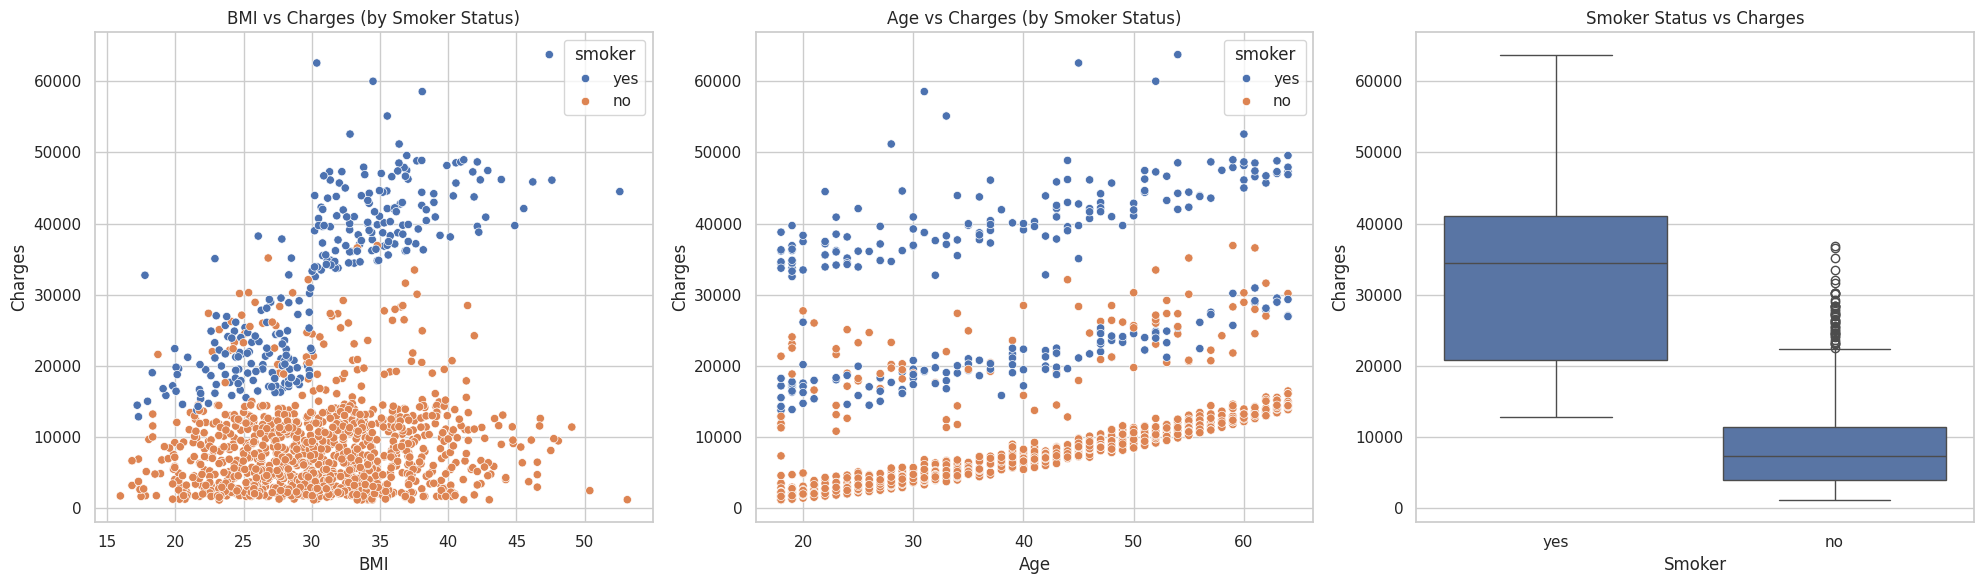

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1: BMI vs Charges
sns.scatterplot(data=df, x="bmi", y="charges", hue="smoker", ax=axes[0])
axes[0].set_title("BMI vs Charges (by Smoker Status)")
axes[0].set_xlabel("BMI")
axes[0].set_ylabel("Charges")

# Plot 2: Age vs Charges
sns.scatterplot(data=df, x="age", y="charges", hue="smoker", ax=axes[1])
axes[1].set_title("Age vs Charges (by Smoker Status)")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Charges")

# Plot 3: Smoker vs Charges (Boxplot)
sns.boxplot(data=df, x="smoker", y="charges", ax=axes[2])
axes[2].set_title("Smoker Status vs Charges")
axes[2].set_xlabel("Smoker")
axes[2].set_ylabel("Charges")

# Adjust layout and display
plt.tight_layout()
plt.show()


In [7]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"📉 Mean Absolute Error (MAE): {mae:,.2f}")
print(f"📐 Root Mean Squared Error (RMSE): {rmse:,.2f}")


📉 Mean Absolute Error (MAE): 4,181.19
📐 Root Mean Squared Error (RMSE): 5,796.28
